In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Cargar el dataset
data = pd.read_csv("Titanic-Dataset.csv")

In [6]:

# Vista rápida del dataset
print(data.head())
print(data.info())
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:

# Valores faltantes
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


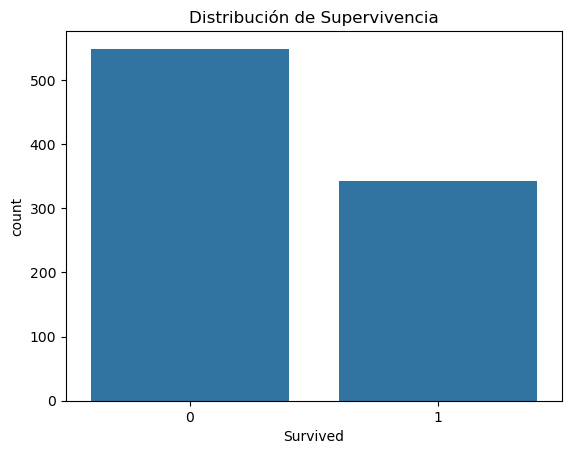

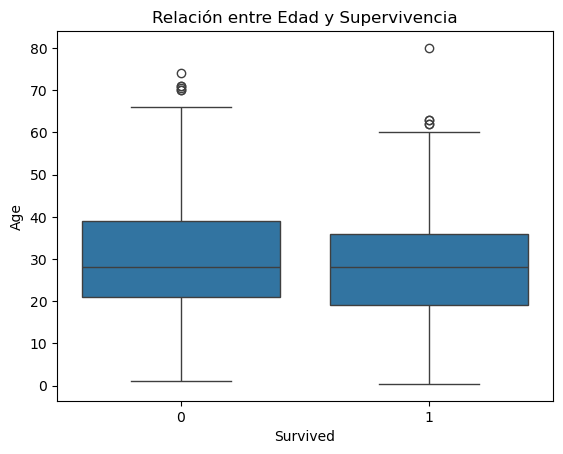

In [10]:
# Gráficos básicos
sns.countplot(x="Survived", data=data)
plt.title("Distribución de Supervivencia")
plt.show()

sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Relación entre Edad y Supervivencia")
plt.show()

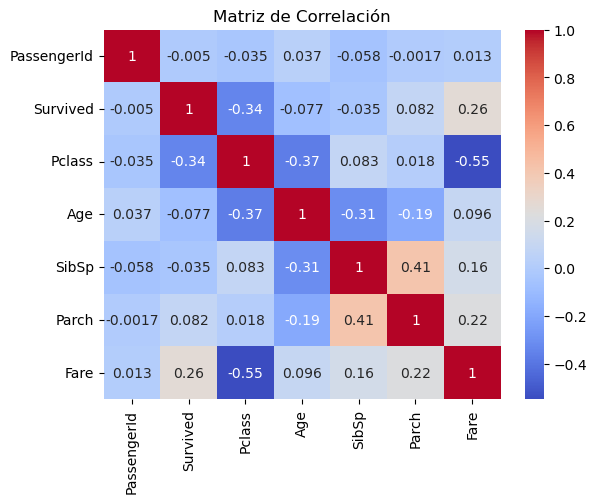

In [18]:
# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [24]:
# Reemplazar valores faltantes en la columna 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

In [28]:
data = (
    data
    .assign(Age=lambda df: df['Age'].fillna(df['Age'].median()))  # Rellenar 'Age'
    .dropna(subset=['Embarked'])  # Eliminar filas con 'Embarked' nulo
)

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

In [34]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [36]:
data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [38]:
# Selección manual basada en el contexto del problema
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Instanciar y entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



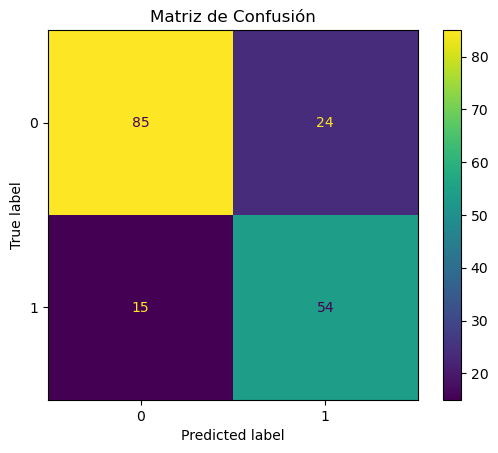

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusión")
plt.show()

      Feature  Coefficient
4        Fare     0.001749
1         Age    -0.043250
3       Parch    -0.052749
6  Embarked_Q    -0.064586
2       SibSp    -0.375987
7  Embarked_S    -0.481855
0      Pclass    -1.122231
5    Sex_male    -2.630826


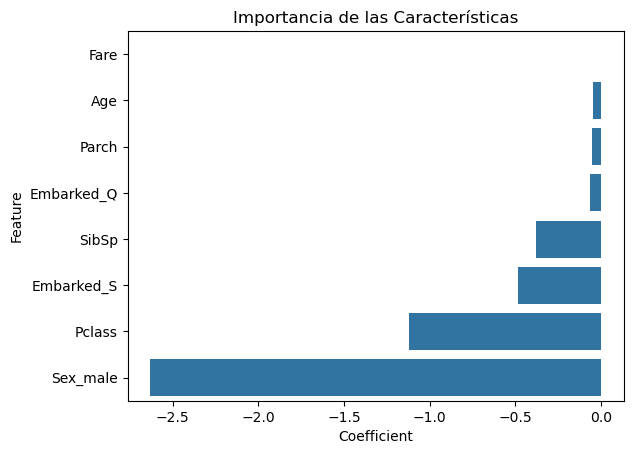

In [48]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Importancia de las Características")
plt.show()
